# Fourier analysis (MSAP4-01A)

In [1]:
import plato_msap4_demonstrator as msap4
import plato_msap4_demonstrator_datasets.plato_sim_dataset as plato_sim_dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## K2: Rotation period analysis

In [3]:
t, s, dt = msap4.load_k2_example ()

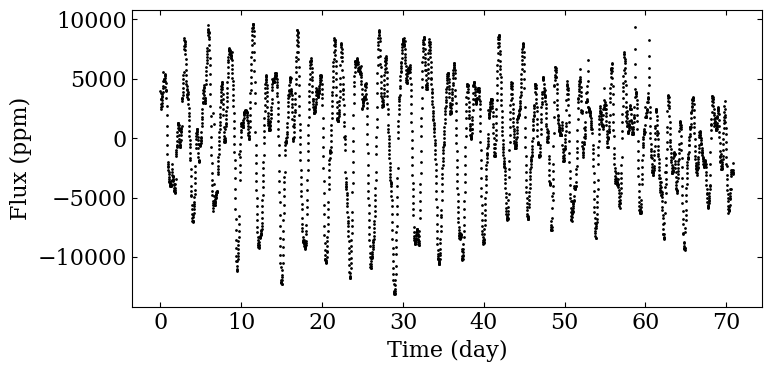

In [4]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s!=0]-t[0], s[s!=0], color='black', 
            marker='o', s=1)

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

fig.tight_layout ()

As we want to recover rotation periods below 45 days, we only consider the section of the periodogram verifying $P < P_\mathrm{cutoff} = 45$ days.

In [5]:
pcutoff = 45

As a preprocessing step, we compute the Lomb-Scargle periodogram (in the SAS framework, it will be directyly provided by MSAP1).

In [6]:
p_ps, ps_object = msap4.compute_lomb_scargle (t, s)
ls = ps_object.power_standard_norm

Now we perform the periodogram analysis.

0         1         2         3             4
0  2.787376  0.027603  0.028161  0.422299  1.000000e-16
1  1.393418  0.013796  0.014075  0.216592  1.000000e-16
2  0.779115  0.007714  0.007870  0.057243  1.000000e-16

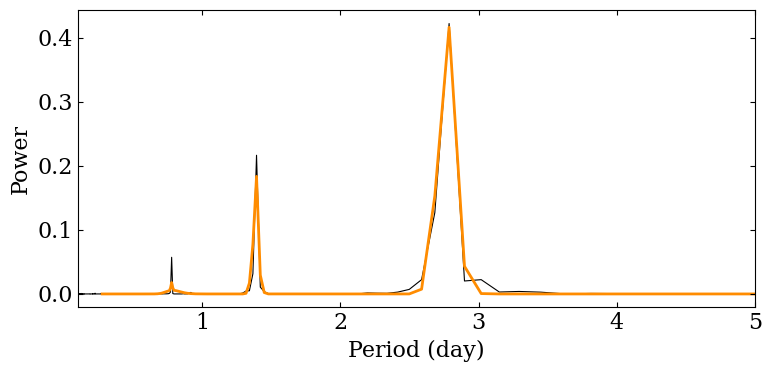

In [7]:
cond = p_ps < pcutoff
prot, e_p, E_p, param, h_ps = msap4.compute_prot_err_gaussian_fit_chi2_distribution (p_ps[cond], ls[cond], n_profile=20, 
                                                                                     threshold=0.1, plot_procedure=False,
                                                                                     verbose=False)
msap4.plot_ls (p_ps, ls, filename='figures/fourier_k2.png', param_profile=param, 
               logscale=False, xlim=(0.1, 5))
IDP_123_PROT_FOURIER = msap4.prepare_idp_fourier (param, h_ps, ls.size,
                                                  pcutoff=pcutoff, pthresh=None,
                                                  fapcutoff=1e-6)

df = pd.DataFrame (data=IDP_123_PROT_FOURIER)
df

In [8]:
df.to_latex (buf='data_products/idp_123_prot_fourier_k2_211015853.tex', 
             formatters=['{:.2f}'.format, '{:.2f}'.format, '{:.2f}'.format,
                         '{:.2f}'.format, '{:.0e}'.format],  
             index=False, header=False)
np.savetxt ('data_products/IDP_123_PROT_FOURIER_K2.dat', 
             IDP_123_PROT_FOURIER)

/var/folders/z1/83qr1p117c53sns4d4msv6kdw50fz0/T/ipykernel_6587/3364933883.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex (buf='data_products/idp_123_prot_fourier_k2_211015853.tex',


This time, we are interested in recovering long term modulations. We consider the section of the periodogram verifying $P > P_\mathrm{tresh} = 90$ days.

## PLATO: Rotation period analysis

In [9]:
filename = msap4.get_target_filename (plato_sim_dataset, '040', filetype='csv')
t, s, dt = msap4.load_resource (filename)

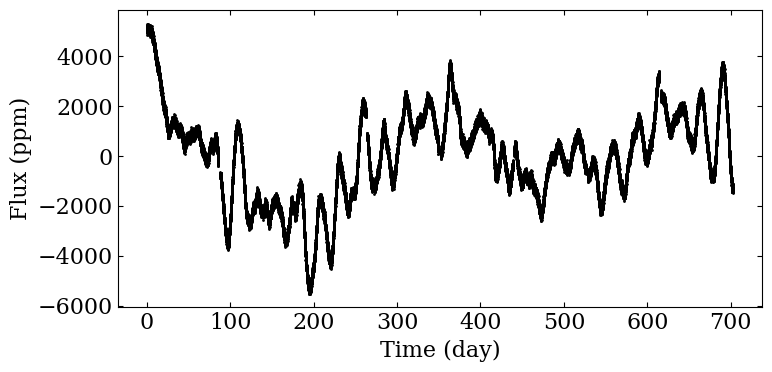

In [10]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s!=0]-t[0], s[s!=0], color='black', 
            marker='o', s=1)

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

fig.tight_layout ()

As we want to recover rotation periods below 45 days, we only consider the section of the periodogram verifying $P < P_\mathrm{cutoff} = 45$ days.

In [11]:
pcutoff = 45

As a preprocessing step, we compute the Lomb-Scargle periodogram (in the SAS framework, it will be directyly provided by MSAP1).

In [12]:
p_ps, ps_object = msap4.compute_lomb_scargle (t, s)
ls = ps_object.power_standard_norm

Now we perform the periodogram analysis.

0         1         2         3             4
0  25.750841  0.255524  0.260698  0.041200  1.000000e-16
1  36.470886  0.428032  0.438321  0.032378  1.000000e-16

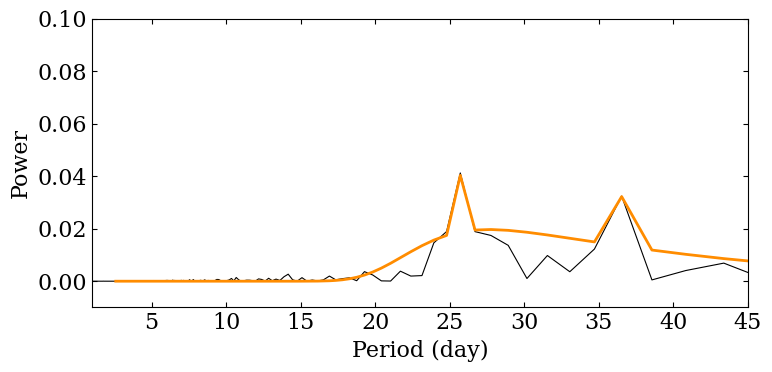

In [13]:
cond = p_ps < pcutoff
prot, e_p, E_p, param, h_ps = msap4.compute_prot_err_gaussian_fit_chi2_distribution (p_ps[cond], ls[cond], n_profile=20, 
                                                                                     threshold=0.1,
                                                                                     verbose=False)
msap4.plot_ls (p_ps, ls, filename='figures/fourier_plato_short.png', param_profile=param, 
               logscale=False, xlim=(1, pcutoff), ylim=(-0.01, 0.1))
IDP_123_PROT_FOURIER = msap4.prepare_idp_fourier (param, h_ps, ls.size,
                                                  pcutoff=pcutoff, pthresh=None,
                                                  fapcutoff=1e-6)
df = pd.DataFrame (data=IDP_123_PROT_FOURIER)
df

In [14]:
df.to_latex (buf='data_products/idp_123_prot_fourier_plato_040.tex', 
             formatters=['{:.2f}'.format, '{:.2f}'.format, '{:.2f}'.format,
                         '{:.2f}'.format, '{:.0e}'.format],  
             index=False, header=False)
np.savetxt ('data_products/IDP_123_PROT_FOURIER_PLATO.dat', 
             IDP_123_PROT_FOURIER)

/var/folders/z1/83qr1p117c53sns4d4msv6kdw50fz0/T/ipykernel_6587/1520620131.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex (buf='data_products/idp_123_prot_fourier_plato_040.tex',


## PLATO: Long term modulation analysis

This time, we are interested in recovering long term modulations. We consider the section of the periodogram verifying $P > P_\mathrm{tresh} = 90$ days.

In [15]:
pthresh = 90

As a preprocessing step, we compute the Lomb-Scargle periodogram (in the SAS framework, it will be directyly provided by MSAP1).

In [16]:
p_ps, ps_object = msap4.compute_lomb_scargle (t, s)
ls = ps_object.power_standard_norm

Now we perform the periodogram analysis.

0          1          2         3             4
0  347.127534  31.561216  38.575952  0.500829  1.000000e-16
1  700.965183  64.289193  78.730828  0.130459  1.000000e-16

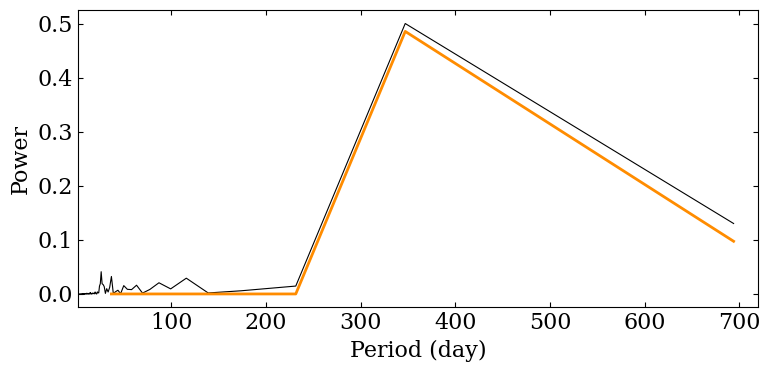

In [17]:
plongterm, e_p, E_p, param, h_ps = msap4.compute_prot_err_gaussian_fit_chi2_distribution (p_ps[p_ps>pthresh], ls[p_ps>pthresh], 
                                                                                          n_profile=5, threshold=0.1, verbose=False)
fig = msap4.plot_ls (p_ps, ls, filename='figures/fourier_plato_long.png', param_profile=param, 
                    logscale=False, xlim=(1,8*pthresh))
IDP_123_LONGTERM_MODULATION_FOURIER = msap4.prepare_idp_fourier (param, h_ps, ls.size,
                                                                 pcutoff=None, pthresh=pthresh,
                                                                 fapcutoff=1e-6)
df = pd.DataFrame (data=IDP_123_LONGTERM_MODULATION_FOURIER)
df

In [18]:
df.to_latex (buf='data_products/idp_123_longterm_modulation_fourier_plato_040.tex', 
             formatters=['{:.2f}'.format, '{:.2f}'.format, '{:.2f}'.format,
                         '{:.2f}'.format, '{:.0e}'.format],  
             index=False, header=False)
np.savetxt ('data_products/IDP_123_LONGTERM_MODULATION_FOURIER_PLATO.dat', 
             IDP_123_LONGTERM_MODULATION_FOURIER)

/var/folders/z1/83qr1p117c53sns4d4msv6kdw50fz0/T/ipykernel_6587/2522956954.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex (buf='data_products/idp_123_longterm_modulation_fourier_plato_040.tex',
